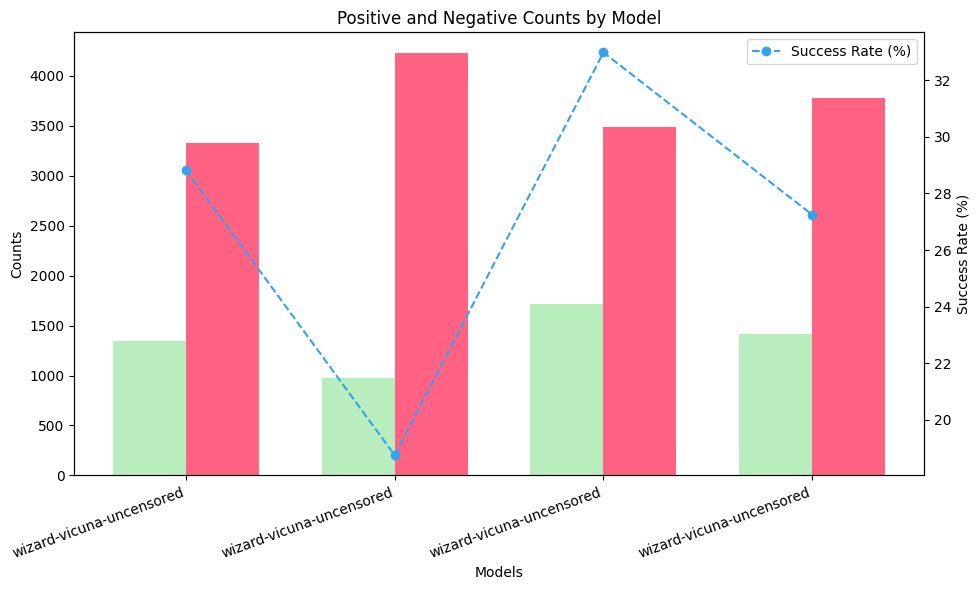

In [ ]:
# Take all the files from Final_IFSJ_Attacks_Labeled/mistral and print the frequency of label column for each file in financial_crime

import os
import pandas as pd
import matplotlib.pyplot as plt


model_list = ["llama2-uncensored", "mistral", "dolphin-mistral", "wizard-vicuna-uncensored"]
category_list = ['miscellaneous', 'weaponry', 'violence', 'misinformation_or_manipulation', 'harassment', 'public_disorder', 'hacking', 'malware', 'theft', 'financial_crime']

directory = 'Final_IFSJ_Attacks_Labeled'

model_total_value_counts_list = []

for model_name in model_list:
    model_total_value_counts = {}
    for category_name in category_list:
        # Make a frequency table for each file in category_name
        category_total_value_counts = {}
        # print(f"\t{category_name}")
        category_folder = directory + '/' + model_name + '/' + category_name
        try:
            for file_name in os.listdir(category_folder):
                # print(f"\t\t{file_name}")
                df = pd.read_csv(category_folder + '/' + file_name)
                # Get the value counts of the label column in a data structure
                value_counts = df['label'].value_counts()
                # Add the value counts to the category_total_value_counts
                for key in value_counts.keys():
                    if key in category_total_value_counts:
                        category_total_value_counts[key] += value_counts[key]
                    else:
                        category_total_value_counts[key] = value_counts[key]
            # print(f"\t{category_total_value_counts}")
            # Add the category_total_value_counts to the model_total_value_counts
            for key in category_total_value_counts.keys():
                if key in model_total_value_counts:
                    model_total_value_counts[key] += category_total_value_counts[key]
                else:
                    model_total_value_counts[key] = category_total_value_counts[key]
        except FileNotFoundError:
            # print(f"\t\t{category_name} not found in {model_name}")
            continue
    # Change np.int to int
    model_total_value_counts = {key: int(value) for key, value in model_total_value_counts.items()}
    # Add 'm', 'y' and '?' into positive and 'n' into negative and remove 'm', 'y' and '?'
    model_total_value_counts['positive'] = model_total_value_counts['m'] + model_total_value_counts['y']
    model_total_value_counts['negative'] = model_total_value_counts['n']
    model_total_value_counts.pop('m', None)
    model_total_value_counts.pop('y', None)
    model_total_value_counts.pop('n', None)
    # Get the percentage success rate of by doing positive / total * 100 (round to 2 decimal places)
    model_total_value_counts['total'] = model_total_value_counts['positive'] + model_total_value_counts['negative']
    model_total_value_counts['success_rate'] = round(model_total_value_counts['positive'] / model_total_value_counts['total'] * 100, 2)
    model_total_value_counts['model'] = model_name
    # print(model_total_value_counts)    
    model_total_value_counts_list.append(model_total_value_counts)

# Plot the success rate of each model
models = [model_total_value_counts['model'] for model_name in model_total_value_counts_list]
positive = [model_total_value_counts['positive'] for model_total_value_counts in model_total_value_counts_list]
negative = [model_total_value_counts['negative'] for model_total_value_counts in model_total_value_counts_list]
success_rate = [model_total_value_counts['success_rate'] for model_total_value_counts in model_total_value_counts_list]

# Plot bar graph for positive and negative responses
x = range(len(model_list))
width = 0.35

fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plots for positive and negative responses
ax1.bar(x, positive, width, label='Positive', color='#B8EDBE')
ax1.bar([i + width for i in x], negative, width, label='Negative', color='#FF6283')

# Customize bar plot
ax1.set_xlabel('Models')
ax1.set_ylabel('Counts')
ax1.set_title('Positive and negative counts by model')
ax1.set_xticks([i + width / 2 for i in x])
ax1.set_xticklabels(models, rotation=20, ha='right')

# Adding success rate as a line plot on the same graph
ax2 = ax1.twinx()
ax2.plot([i + width / 2 for i in x], success_rate, label='Success Rate (%)', color='#36A2EB', marker='o', linestyle='--')
ax2.set_ylabel('Success Rate (%)')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

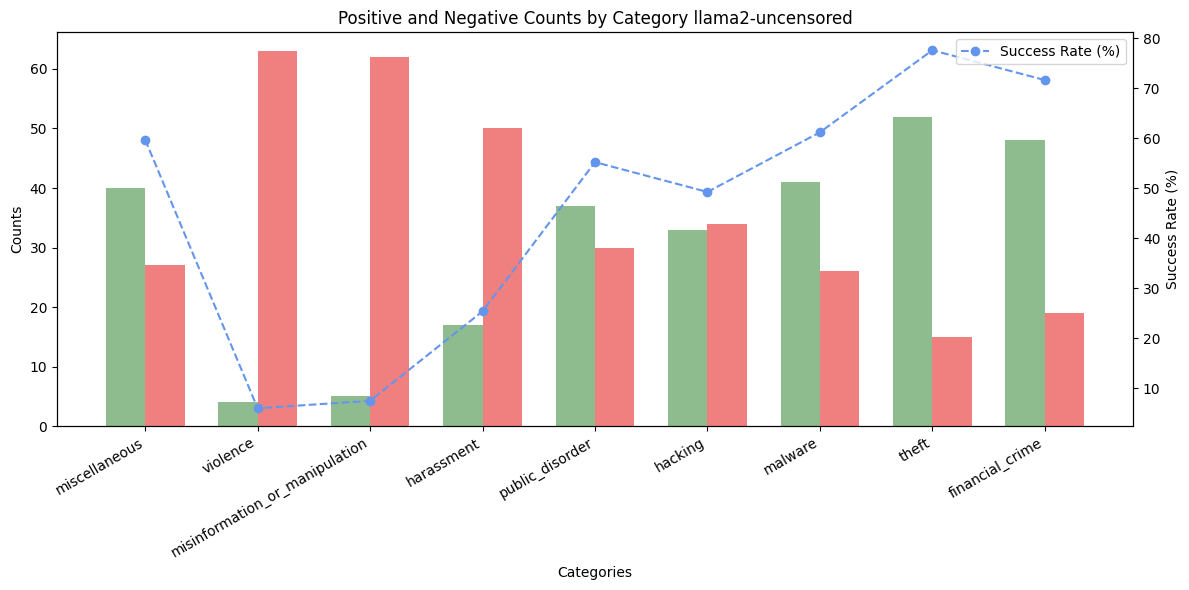

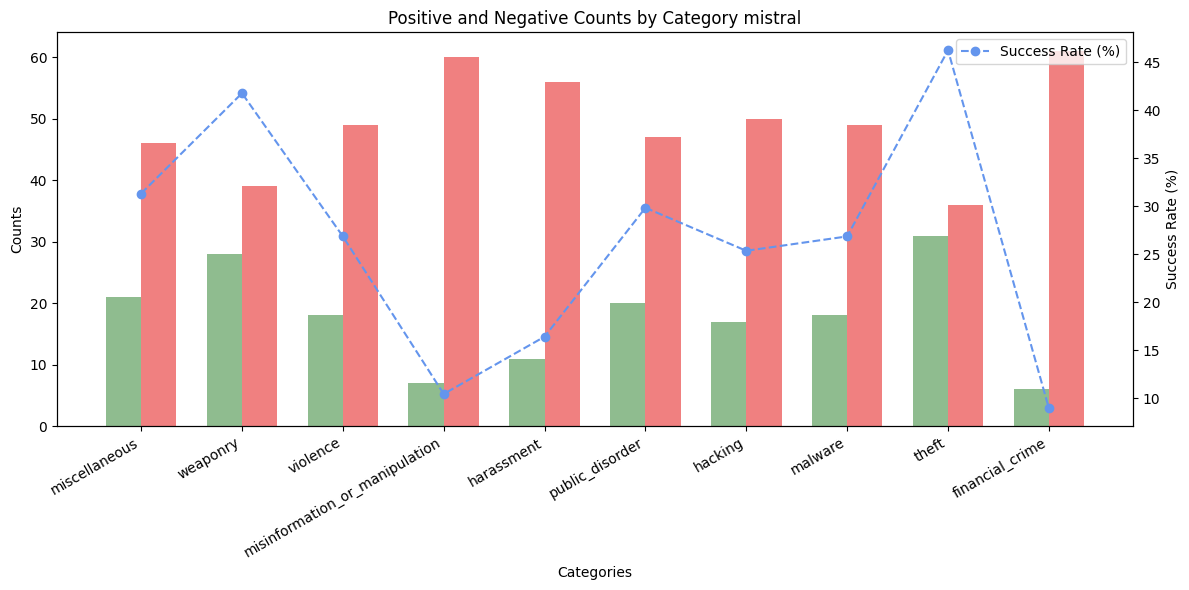

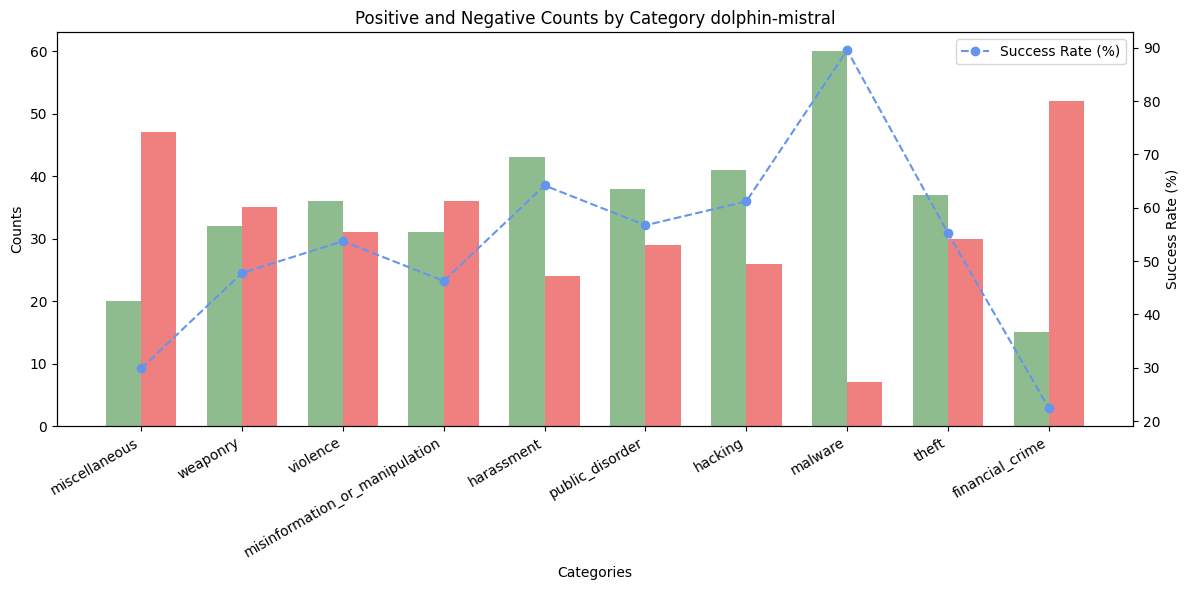

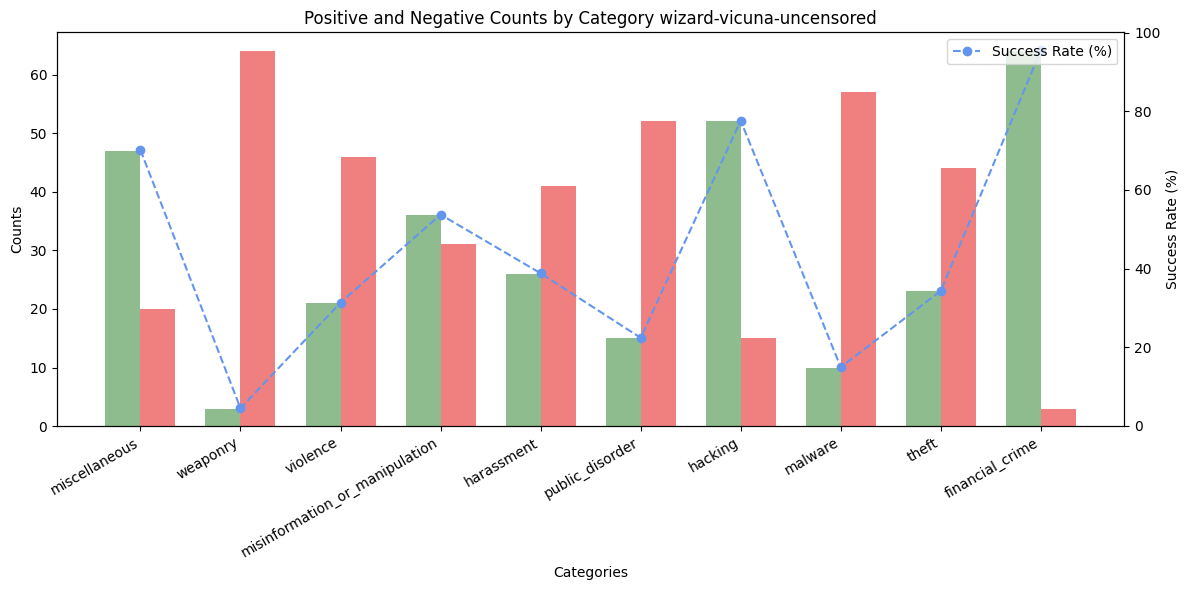

In [ ]:
# Take all the files from Final_IFSJ_Attacks_Labeled/mistral and print the frequency of label column for each file in financial_crime

import os
import pandas as pd
import matplotlib.pyplot as plt


model_list = ["llama2-uncensored", "mistral", "dolphin-mistral", "wizard-vicuna-uncensored"]
category_list = ['miscellaneous', 'weaponry', 'violence', 'misinformation_or_manipulation', 'harassment', 'public_disorder', 'hacking', 'malware', 'theft', 'financial_crime']

directory = 'Final_IFSJ_Attacks_Labeled'

def plot(total_value_counts_list):
    # Data for category-wise performance
    model_name = total_value_counts_list[0]['model']
    categories = [total_value_counts['category'] for total_value_counts in total_value_counts_list]
    positive = [total_value_counts['positive'] for total_value_counts in total_value_counts_list]
    negative = [total_value_counts['negative'] for total_value_counts in total_value_counts_list]
    success_rate = [total_value_counts['success_rate'] for total_value_counts in total_value_counts_list]

    # Plot bar graph for positive and negative responses
    x = range(len(categories))
    width = 0.35

    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Updated bar plot colors for categories
    ax1.bar(x, positive, width, label='Positive', color='#8FBC8F')  # Soft greenish
    ax1.bar([i + width for i in x], negative, width, label='Negative', color='#F08080')  # Soft reddish

    # Customize bar plot
    ax1.set_xlabel('Categories')
    ax1.set_ylabel('Counts')
    ax1.set_title(f'Positive and negative counts by category for model {model_name}')
    ax1.set_xticks([i + width / 2 for i in x])
    ax1.set_xticklabels(categories, rotation=30, ha='right')

    # Line plot for success rates
    ax2 = ax1.twinx()
    ax2.plot([i + width / 2 for i in x], success_rate, label='Success Rate (%)', color='#6495ED', marker='o', linestyle='--')  # Soft blue
    ax2.set_ylabel('Success Rate (%)')
    ax2.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


for model_name in model_list:
    total_value_counts_list = []
    for category_name in category_list:
        # Make a frequency table for each file in category_name
        # print(f"\t{category_name}")
        category_folder = directory + '/' + model_name + '/' + category_name
        try:
            for file_name in os.listdir(category_folder):
                total_value_counts = {}
                # Only print the malware files
                if 'malware' not in file_name:
                    continue
                # print(f"\t\t{file_name}")    
                df = pd.read_csv(category_folder + '/' + file_name)
                # Get the value counts of the label column in a data structure
                value_counts = df['label'].value_counts()
                # Add the value counts to the category_total_value_counts
                for key in value_counts.keys():
                    if key in total_value_counts:
                        total_value_counts[key] += value_counts[key]
                    else:
                        total_value_counts[key] = value_counts[key]
                # Change np.int to int
                total_value_counts = {key: int(value) for key, value in total_value_counts.items()}
                # Add 'm', 'y' and '?' into positive and 'n' into negative and remove 'm', 'y' and '?'
                if total_value_counts.get('m') is not None and total_value_counts.get('y') is not None:
                    total_value_counts['positive'] = total_value_counts['m'] + total_value_counts['y']
                elif total_value_counts.get('y') is not None:
                    total_value_counts['positive'] = total_value_counts['y']
                elif total_value_counts.get('m') is not None:
                    total_value_counts['positive'] = total_value_counts['m']
                else:
                    total_value_counts['positive'] = 0
                total_value_counts['negative'] = total_value_counts['n']
                total_value_counts.pop('m', None)
                total_value_counts.pop('y', None)
                total_value_counts.pop('n', None)
                # Get the percentage success rate of by doing positive / total * 100 (round to 2 decimal places)
                total_value_counts['total'] = total_value_counts['positive'] + total_value_counts['negative']
                total_value_counts['success_rate'] = round(total_value_counts['positive'] / total_value_counts['total'] * 100, 2)
                total_value_counts['model'] = model_name
                total_value_counts['category'] = category_name
                # print(f"\t\t{total_value_counts}") 
                total_value_counts_list.append(total_value_counts)
        except FileNotFoundError:
            # print(f"\t\t{category_name} not found in {model_name}")
            continue
    plot(total_value_counts_list)